In [13]:
# 특정 이미지 출력 함수
import matplotlib.pyplot as plt
import cv2
# import matplotlib.image as img

def target_img_show(path):
    plt.figure(figsize=(5, 5))
    #img_test = img.imread(path)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    plt.imshow(img2)
    # plt.imshow(img_test)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [72]:
# 추천제품 이미지 출력 함수
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
import requests
from io import BytesIO
from PIL import Image
import time
import random
product_df = pd.read_csv('./Data/product.csv', index_col=0)
product_df = product_df.drop([0]).reset_index(drop=True)
result_df = product_df.astype({'price': 'int'})

# 다운받을 이미지 url
def img_show(url):
    # request.get 요청
    res = requests.get(url)

    #Img open
    request_get_img = Image.open(BytesIO(res.content))

    # 이미지 크기 조정
    image= request_get_img.resize((int(request_get_img.width/2), int(request_get_img.height/2)))
    return image
    # return request_get_img

def show_img(label):
    if label == 0:
        plt.figure(figsize=(8, 11))
        dataset = result_df[result_df['label'] == '머릿결 관리'].reset_index(drop=True)
        for i in range(4):
            random_idx = random.randint(0,len(result_df[result_df['label'] == '머릿결 관리'])-1)
            plt.subplot(2, 2, i + 1)
            # plt.title(dataset['name'][i])
            plt.imshow(img_show(dataset['img'][random_idx]))
            plt.xticks([])
            if len(dataset['name'][random_idx]) > 30:
                tmp_num = dataset['name'][random_idx].split(' ')
                plt.xlabel((' '.join(tmp_num[0:5]))+ '\n'+ (' '.join(tmp_num[5:])) + '\n\n가격 : ' + (format(dataset['price'][random_idx], ',')) + '원\n' + '위치 : ' + dataset['loc'][random_idx] )
            else:
                plt.xlabel(dataset['name'][random_idx] + '\n\n가격 : ' + (format(dataset['price'][random_idx], ',')) + '원\n' + '위치 : ' + dataset['loc'][random_idx] )

            plt.yticks([])
        plt.show()
    else:
        plt.figure(figsize=(8, 11))
        target = ['샴푸', '트리트먼트', '헤어토닉', '세럼/앰플']
        for i in range(4):
            plt.subplot(2, 2, i + 1)
            plt.title(target[i])
            dataset = result_df[result_df['label'] == target[i]].reset_index(drop=True)
            random_idx = random.randint(0,len(result_df[result_df['label'] == target[i]])-1)
            
            plt.imshow(img_show(dataset['img'][random_idx]))
            plt.xticks([])
            if len(dataset['name'][random_idx]) > 30:
                tmp_num = dataset['name'][random_idx].split(' ')
                plt.xlabel((' '.join(tmp_num[0:4]))+ '\n'+ (' '.join(tmp_num[4:])) + '\n\n가격 : ' + (format(dataset['price'][random_idx], ',')) + '원\n' + '위치 : ' + dataset['loc'][random_idx] )
            else:
                plt.xlabel(dataset['name'][random_idx] + '\n\n가격 : ' + (format(dataset['price'][random_idx], ',')) + '원\n' + '위치 : ' + dataset['loc'][random_idx] )

            plt.yticks([])
        plt.show()

In [73]:
# 화면 출력 함수
from datetime import datetime
def show_result(label):
    if label == 0:
        result = '양호'
    elif label == 1:
        result = '경증'
    elif label == 2:
        result = '중등도'
    else:
        result = '중증'
    now = datetime.today().strftime("%Y-%m-%d %H:%M:%S")
    
    bold = '\033[1m'
    redtext = '\033[31m'
    reset = '\033[0m'
    
    print(bold+ '똑똑, '+ redtext +'탈모 경찰'+ bold +'입니다.' +reset)
    target_img_show(path)
    print(bold+ '귀하의 탈모증상은 '+ bold+ redtext+ f'{label}단계로 {result}'+reset+ bold +'입니다.' + reset)
    print('\n')
    if result == '양호':
        print(bold + redtext + '축하드립니다! 탈모가 존재하지 않습니다.' + reset)
        print(bold +'머릿결까지 잡아보시는거 어떠신가요 ?'+ reset)
        print(bold +'찰랑이는 머릿결 관리 제품 추천드립니다.'+ reset)
        print('\n')
        print('각 제품은 종류별 인기순(1~24) 랜덤으로 출력됩니다.')
        print('진단 영수증을 통해 더 많은 제품 확인 가능합니다.')
        print('-'*70)
        show_img(label)
    else:
        if result == '중증':
            print(bold + redtext + '!주의! 탈모 3단계 중 중증으로 병원 방문 권해드립니다.'+ reset)
        print(bold + '증상이 확인되어 탈모 케어 제품 추천드립니다.' + reset)
        print('\n')
        print('각 제품은 종류별 인기순(1~24) 랜덤으로 출력됩니다.')
        print('진단 영수증을 통해 더 많은 제품 확인 가능합니다.')
        print('-'*70)
        show_img(label)

똑똑, 탈모 경찰입니다.


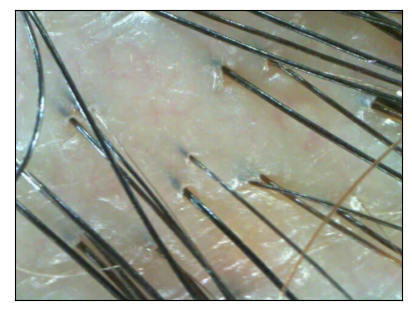

귀하의 탈모증상은 0단계로 양호입니다.


축하드립니다! 탈모가 존재하지 않습니다.
머릿결까지 잡아보시는거 어떠신가요 ?
찰랑이는 머릿결 관리 제품 추천드립니다.


각 제품은 종류별 인기순(1~24) 랜덤으로 출력됩니다.
진단 영수증을 통해 더 많은 제품 확인 가능합니다.
----------------------------------------------------------------------


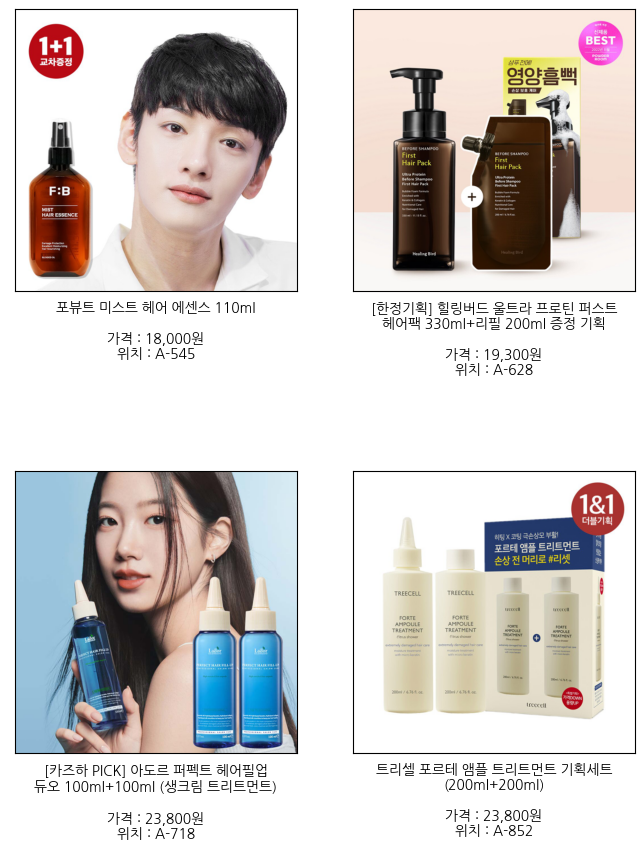

In [75]:
show_result(0)

In [5]:
# 큐알코드 만드는 함수
import matplotlib.pyplot as plt
import matplotlib.image as img
import qrcode
def make_qrcode(url, file_name):
    img_url = qrcode.make(url)
    img_url.save('./QRcode/' + file_name + '.jpg')
    return './QRcode/' + file_name + '.jpg'

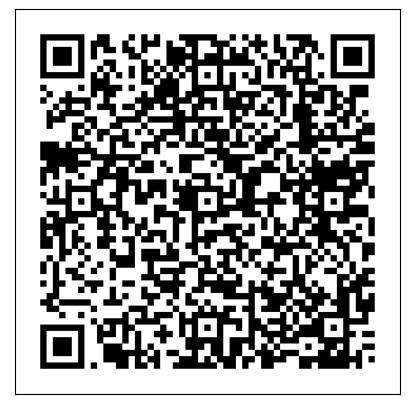

In [6]:
url = 'https://www.oliveyoung.co.kr/store/search/getSearchMain.do?query=%ED%83%88%EB%AA%A8&giftYn=N&t_page=%ED%99%88&t_click=%EA%B2%80%EC%83%89%EC%B0%BD&t_search_name=%ED%83%88%EB%AA%A8'
qr_path = make_qrcode(url, 'level1~3')
target_img_show(qr_path)

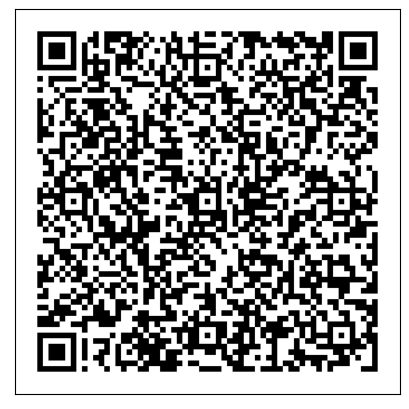

In [7]:
url = 'https://www.oliveyoung.co.kr/store/search/getSearchMain.do?query=%EB%A8%B8%EB%A6%BF%EA%B2%B0&giftYn=N&t_page=%EB%A8%B8%EB%A6%BF%EA%B2%B0%EA%B4%80%EB%A6%AC%EA%B2%80%EC%83%89&t_click=%EA%B2%80%EC%83%89%EC%B0%BD&t_search_name=%EB%A8%B8%EB%A6%BF%EA%B2%B0'
qr_path = make_qrcode(url, 'level0')
target_img_show(qr_path)

In [15]:
# 증상 단계별 큐알코드 출력 함수
import cv2
import matplotlib.pyplot as plt
def show_qrcode(level):
    if level == '양호':
        img_1 = cv2.imread('./QRcode/level0.jpg', cv2.IMREAD_COLOR)
    else:
        img_1 = cv2.imread('./QRcode/level1~3.jpg', cv2.IMREAD_COLOR) 
    img_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(2.5, 2.5))
    plt.imshow(img_rgb)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [16]:
# 진단 영수증 출력 함수
from datetime import datetime
import cv2
def print_result(label):
    if label == 0:
        result = '양호'
    elif label == 1:
        result = '경증'
    elif label == 2:
        result = '중등도'
    else:
        result = '중증'
    now = datetime.today().strftime("%Y-%m-%d %H:%M:%S")
    
    bold = '\033[1m'
    redtext = '\033[31m'
    reset = '\033[0m'
    
    print(bold+ '똑똑, '+ redtext +'탈모 경찰'+ bold +'입니다.' +reset)
    print(bold+ '신고 주신 결과 보내드립니다.' + reset)
    print('='*43)
    print('[지점명]\t똑똑탈모경찰 베이스점')
    print('[주소]\t\t2023 딥러닝 프로젝트')
    print(f'[진단날짜]\t{now}')
    print('='*43)
    print(' 증상\t\t진행단계(1~3)\t결과')
    print('-'*43)
    print(f' 탈모\t\t   {label} 단계\t{result}')
    print('-'*43)
    print('\n')
    if result == '양호':
        print(bold + redtext + '축하드립니다! 탈모가 존재하지 않습니다.' + reset)
        print(bold +'머릿결까지 잡아보시는거 어떠신가요 ?'+ reset)
        print(bold +'찰랑이는 머릿결 관리 제품 추천드립니다.'+ reset)
        print('\n')
        print('더 많은 헤어 케어 제품을 원하신다면 \n아래 QR코드로 접속부탁드립니다.')
        print('='*43)
        show_qrcode(result)
        
        
    else:
        if result == '중증':
            print(bold + redtext + '!주의! 탈모 3단계 중 중증으로 병원 방문 권해드립니다.'+ reset)
        print('더 많은 탈모 케어 제품을 원하신다면 \n아래 QR코드로 접속부탁드립니다.')
        print('='*43)
        show_qrcode(result)    

똑똑, 탈모 경찰입니다.
신고 주신 결과 보내드립니다.
[지점명]	똑똑탈모경찰 베이스점
[주소]		2023 딥러닝 프로젝트
[진단날짜]	2023-07-06 09:37:26
 증상		진행단계(1~3)	결과
-------------------------------------------
 탈모		   0 단계	양호
-------------------------------------------


축하드립니다! 탈모가 존재하지 않습니다.
머릿결까지 잡아보시는거 어떠신가요 ?
찰랑이는 머릿결 관리 제품 추천드립니다.


더 많은 헤어 케어 제품을 원하신다면 
아래 QR코드로 접속부탁드립니다.


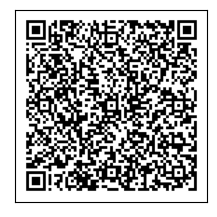

In [17]:
print_result(0)

똑똑, 탈모 경찰입니다.
신고 주신 결과 보내드립니다.
[지점명]	똑똑탈모경찰 베이스점
[주소]		2023 딥러닝 프로젝트
[진단날짜]	2023-07-06 09:37:34
 증상		진행단계(1~3)	결과
-------------------------------------------
 탈모		   1 단계	경증
-------------------------------------------


더 많은 탈모 케어 제품을 원하신다면 
아래 QR코드로 접속부탁드립니다.


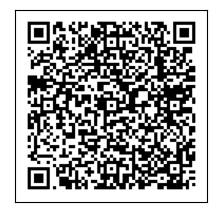

In [18]:
print_result(1)

똑똑, 탈모 경찰입니다.
신고 주신 결과 보내드립니다.
[지점명]	똑똑탈모경찰 베이스점
[주소]		2023 딥러닝 프로젝트
[진단날짜]	2023-07-06 09:37:55
 증상		진행단계(1~3)	결과
-------------------------------------------
 탈모		   2 단계	중등도
-------------------------------------------


더 많은 탈모 케어 제품을 원하신다면 
아래 QR코드로 접속부탁드립니다.


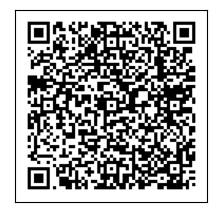

In [20]:
print_result(2)

똑똑, 탈모 경찰입니다.
신고 주신 결과 보내드립니다.
[지점명]	똑똑탈모경찰 베이스점
[주소]		2023 딥러닝 프로젝트
[진단날짜]	2023-07-06 09:37:40
 증상		진행단계(1~3)	결과
-------------------------------------------
 탈모		   3 단계	중증
-------------------------------------------


!주의! 탈모 3단계 중 중증으로 병원 방문 권해드립니다.
더 많은 탈모 케어 제품을 원하신다면 
아래 QR코드로 접속부탁드립니다.


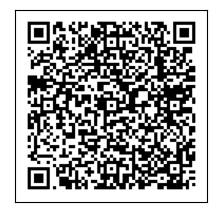

In [19]:
print_result(3)

In [62]:
# 실제 test 데이터에서 하나 선택해 결과 출력 함수
import pandas as pd
import random
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from DenseNet import DenseNet, BottleNeck, Transition
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('./Model/model.pth', map_location=torch.device(device))

talmo = pd.read_csv('./Data/train_test_concat.csv', index_col=0)
talmo.head()

,image_id,image_file_name,미세각질,피지과다,모낭사이홍반,모낭홍반농포,비듬,탈모,where,image_path
0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호.zipfile/0013_A2LEB...
1,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호.zipfile/0177_A2LEB...
2,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호.zipfile/0335_A2LEB...
3,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호.zipfile/0335_A2LEB...
4,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호.zipfile/0425_A2LEB...


In [63]:
# 모델이 예측하는 함수
def predict_image_class(image_path, model):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # 이미지 크기 조정
        transforms.ToTensor(),  # 이미지를 텐서로 변환
        transforms.Normalize(mean=[0.25, 0.25, 0.25], std=[0.1, 0.1, 0.1])
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)

    return predicted.item()

In [69]:
# 이미지 하나를 랜덤으로 선택

path = random.choice(talmo['image_path'])
print('path : ', path)
# pred_class는 모델이 예측한 증상정도 0,1,2,3
pred_class = predict_image_class(path, model)
print('예측 결과 : ',pred_class)

path :  ./Data/Training/[원천]탈모_1.경증.zipfile/5436_A2LEBJJDE00098K_1604634670402_3_TH.jpg
예측 결과 :  1


똑똑, 탈모 경찰입니다.


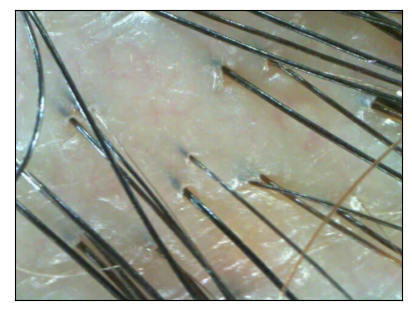

귀하의 탈모증상은 1단계로 경증입니다.


증상이 확인되어 탈모 케어 제품 추천드립니다.


각 제품은 종류별 인기순(1~24) 랜덤으로 출력됩니다.
진단 영수증을 통해 더 많은 제품 확인 가능합니다.
----------------------------------------------------------------------


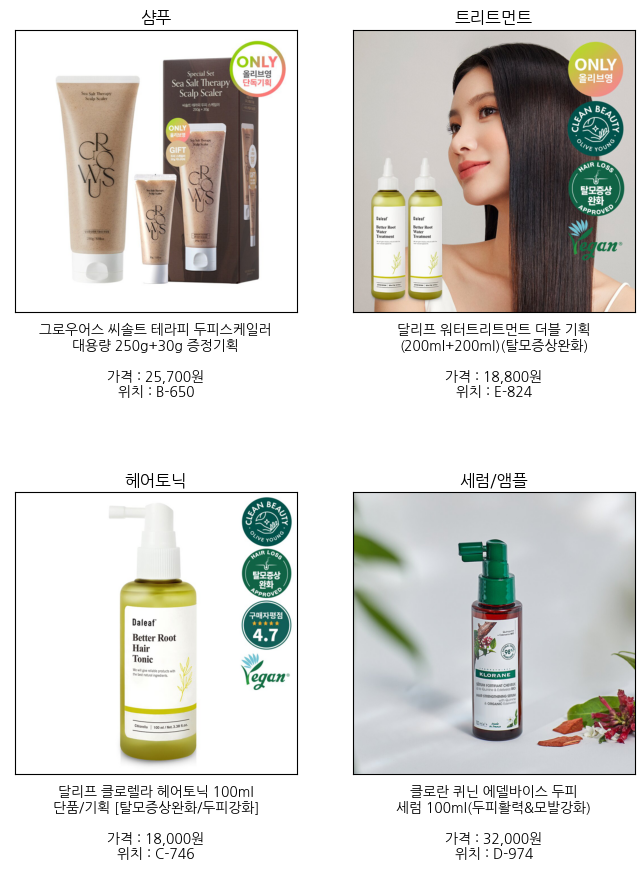

In [76]:
show_result(pred_class)

똑똑, 탈모 경찰입니다.
신고 주신 결과 보내드립니다.
[지점명]	똑똑탈모경찰 베이스점
[주소]		2023 딥러닝 프로젝트
[진단날짜]	2023-07-06 10:06:40
 증상		진행단계(1~3)	결과
-------------------------------------------
 탈모		   1 단계	경증
-------------------------------------------


더 많은 탈모 케어 제품을 원하신다면 
아래 QR코드로 접속부탁드립니다.


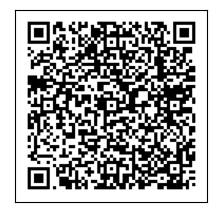

In [70]:
print_result(pred_class)